## Visualizing FIFA World Cup Goals

Importing the dataset from Kaggle ([link](https://www.kaggle.com/abecklas/fifa-world-cup)).

In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.dataset_download_files('abecklas/fifa-world-cup', unzip=True)

Importing the necessary libraries.

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

Loading and inspecting the dataframe.

In [3]:
df = pd.read_csv(
  "WorldCupMatches.csv"
)

print(df.head())

     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                   3.0                   0

Creating a new column for the total of goals scored for each game.

In [4]:
df["Total Goals"] = df["Home Team Goals"] + df["Away Team Goals"]
print(df.head())

     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  ...  Half-time Home Goals  Half-time Away Goals  \
0                 ...                   3.0                   0.0   
1       

Creating simple list of years in which the games were played.

In [5]:
wc_years = sorted(df["Year"].dropna().unique().astype("int"))
print(wc_years)

[1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974, 1978, 1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014]


Creating a barplot to visualize the average number of goals scored during the FIFA World cup games each year.

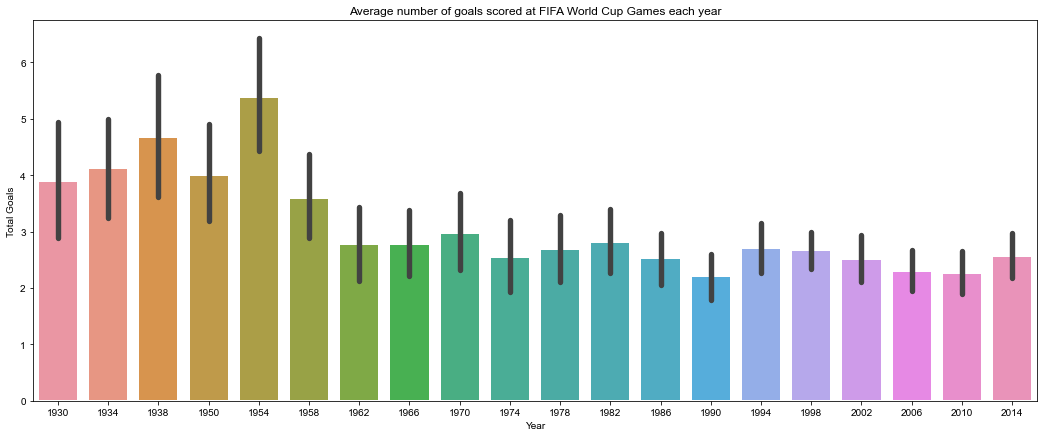

<Figure size 432x288 with 0 Axes>

In [6]:
## Goals scored each year
f, ax = plt.subplots(
  figsize=(18, 7)
)
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = .5)
ax = sns.barplot(
  data=df,
  x="Year",
  y="Total Goals"
)
plt.title("Average number of goals scored at FIFA World Cup Games each year")
ax.set_xticks(range(len(wc_years)))
ax.set_xticklabels(wc_years)
plt.show()
plt.clf()

Creating a specific dataframe contanining only the goals scored and whether they were for home or away games.

In [7]:
df_goals = pd.melt(
    df[["Home Team Goals", "Away Team Goals", "Year"]].dropna().rename(
        columns={"Home Team Goals": "home", "Away Team Goals": "away", "Year": "year"}),
    id_vars=["year"],
    var_name="home/away",
    value_name="goals").astype(
        {"year": "int", "goals": "int"})
print(df_goals.head())

   year home/away  goals
0  1930      home      4
1  1930      home      3
2  1930      home      2
3  1930      home      3
4  1930      home      1


Visualizing the distribution of the goals scored at FIFA World Cup games each year.

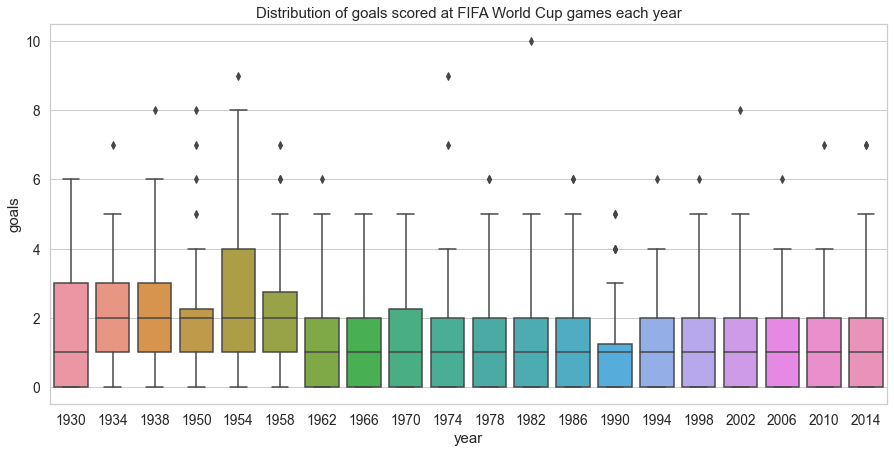

<Figure size 432x288 with 0 Axes>

In [8]:
sns.set_context("notebook", font_scale=1.25)
f, ax2 = plt.subplots(figsize=(15,7))
ax2 = sns.boxplot(data=df_goals, x="year", y="goals")
plt.title("Distribution of goals scored at FIFA World Cup games each year")
plt.show()
plt.clf()

Using a line plot to visualize the change in average number of goals every year.

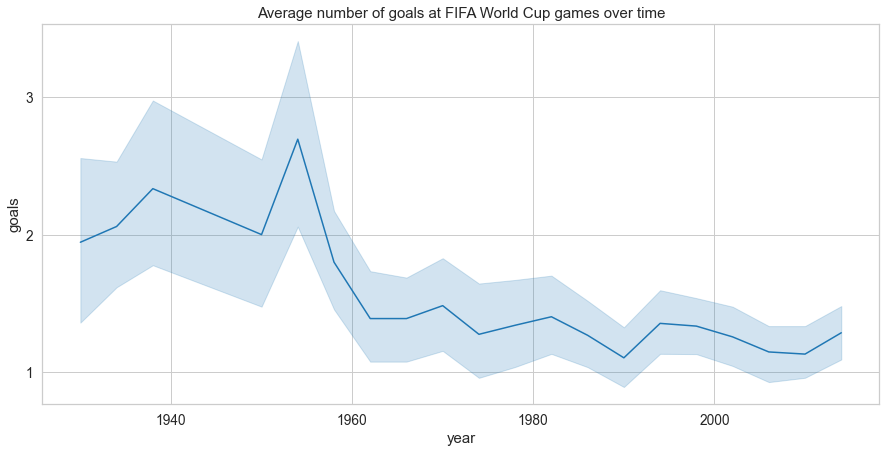

<Figure size 432x288 with 0 Axes>

In [9]:
f, ax3 = plt.subplots(figsize=(15, 7))
ax3 = sns.lineplot(data=df_goals, x="year", y="goals")
ax3.set_yticks([1, 2, 3])
plt.title("Average number of goals at FIFA World Cup games over time")
plt.show()
plt.clf()

Text(0.5, 1.0, 'Distribution of home and away goals in FIFA World Cup games')

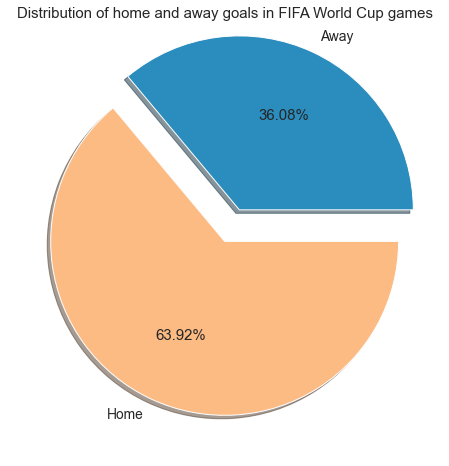

In [11]:
f, ax4 = plt.subplots(figsize=(8, 8))
print()
ax4 = plt.pie(x=df_goals.groupby("home/away").goals.sum(),
                labels=[lab.capitalize() for lab in df_goals.groupby("home/away").goals.sum().index],
                autopct="%.2f%%",
                explode=[0.2, 0],
                shadow=True,
                colors=["#2b8cbe", "#fdbb84"])
plt.title("Distribution of home and away goals in FIFA World Cup games")